In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [251]:
df = pd.read_excel("C:\\Users\\gauri\\Downloads\\WPI_Data.xlsx", sheet_name= 'data' )
print(df.head())
print(df.info())

   Year       WPI
0  1990  204.8580
1  1991  270.5749
2  1992  189.7332
3  1993  191.8816
4  1994  211.5574
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    35 non-null     int64  
 1   WPI     35 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes
None


In [252]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
print(df.index)

DatetimeIndex(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
               '2022-01-01', '2023-01-01', '2024-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)


In [253]:
print(df.describe())

              WPI
count   35.000000
mean   215.399546
std     26.836287
min    179.805400
25%    192.578500
50%    211.557400
75%    235.343800
max    273.224300


Text(0, 0.5, 'Frequency')

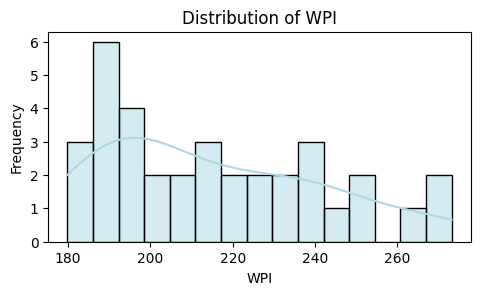

In [254]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df["WPI"], kde=True, bins=15, color="lightblue")
plt.title("Distribution of WPI")
plt.xlabel("WPI")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Boxplot of WPI')

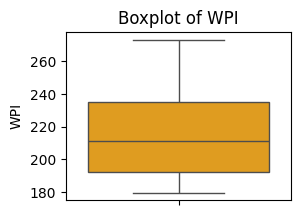

In [255]:
plt.subplot(2, 2, 2)
sns.boxplot(y=df["WPI"], color="orange")
plt.title("Boxplot of WPI")

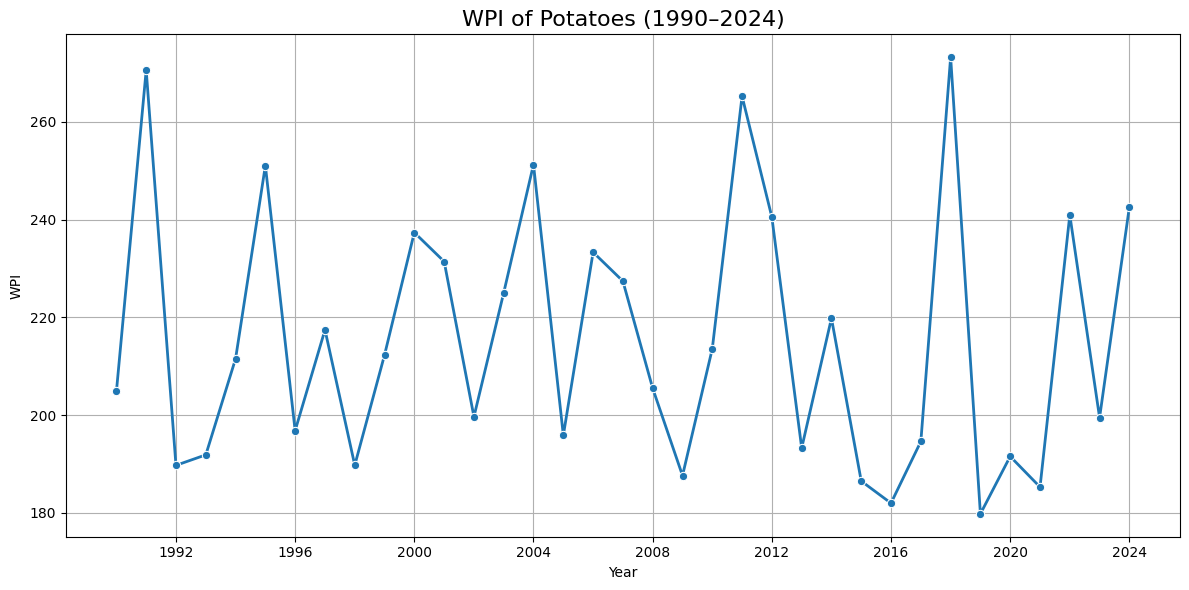

In [256]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='WPI', data=df, marker='o', linewidth=2)
plt.title('WPI of Potatoes (1990–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('WPI')
plt.grid(True)
plt.tight_layout()
plt.show()

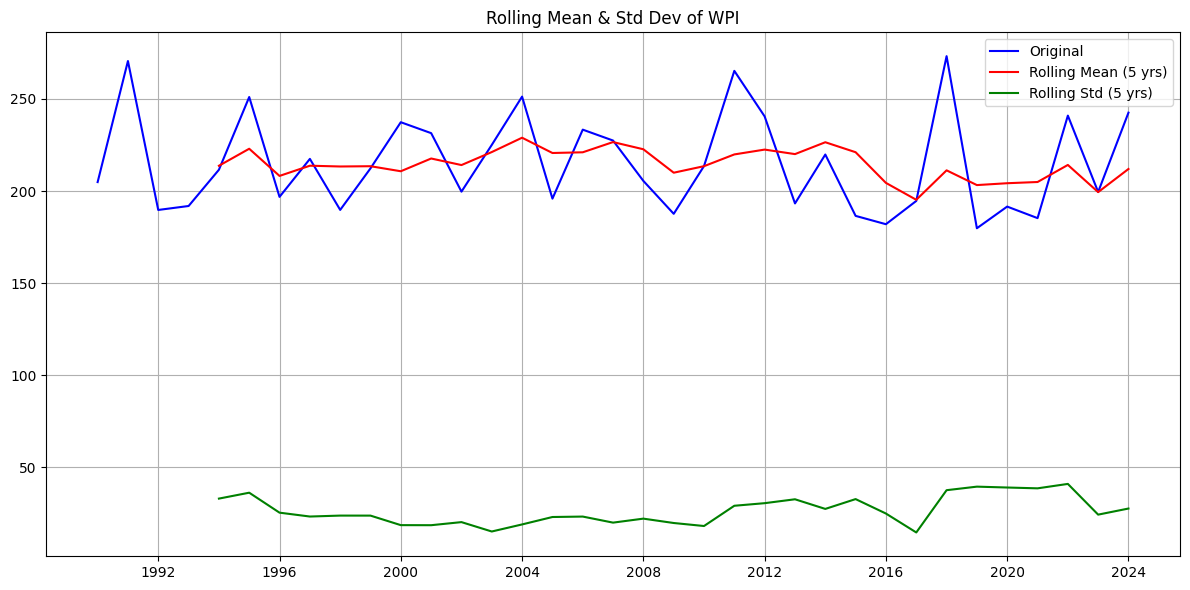

In [257]:
rolling_mean = df['WPI'].rolling(window=5).mean()
rolling_std = df['WPI'].rolling(window=5).std()

plt.figure(figsize=(12, 6))
plt.plot(df['WPI'], label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (5 yrs)', color='red')
plt.plot(rolling_std, label='Rolling Std (5 yrs)', color='green')
plt.title('Rolling Mean & Std Dev of WPI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

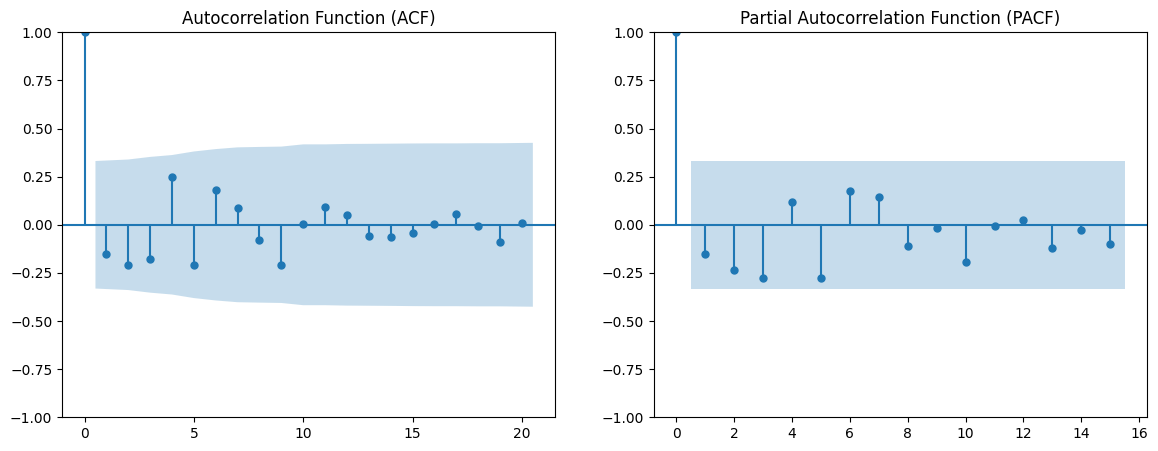

In [258]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

max_lags = min(15, len(df) // 2 - 1)

plot_acf(df["WPI"], ax=ax[0], lags=20)
ax[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(df["WPI"], ax=ax[1], lags=max_lags, method="ywm")
ax[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

In [259]:
#  Augmented Dickey-Fuller (ADF) Test for Stationarity
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df["WPI"])

print("\nAugmented Dickey-Fuller Test:")
print(f"Test Statistic: {adf_result[0]}")
print(f"P-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

if adf_result[1] < 0.05:
    print("The data is stationary (reject H0)")
else:
    print("The data is NOT stationary (fail to reject H0)")


Augmented Dickey-Fuller Test:
Test Statistic: -6.54927258778765
P-value: 8.935530000413682e-09
Critical Values: {'1%': np.float64(-3.639224104416853), '5%': np.float64(-2.9512301791166293), '10%': np.float64(-2.614446989619377)}
The data is stationary (reject H0)


In [260]:
# Normality Tests (Shapiro-Wilk & D’Agostino’s K² Test)
from scipy.stats import shapiro, normaltest

shapiro_test = shapiro(df["WPI"])
print("\nShapiro-Wilk Normality Test:")
print(f"Statistic: {shapiro_test[0]}, P-value: {shapiro_test[1]}")

if shapiro_test[1] < 0.05:
    print("Data is NOT normally distributed")
else:
    print("Data is normally distributed")

dagostino_test = normaltest(df["WPI"])
print("\nD’Agostino’s K² Normality Test:")
print(f"Statistic: {dagostino_test[0]}, P-value: {dagostino_test[1]}")

if dagostino_test[1] < 0.05:
    print("Data is NOT normally distributed")
else:
    print("Data is normally distributed")



Shapiro-Wilk Normality Test:
Statistic: 0.9240586610233167, P-value: 0.018695017705263665
Data is NOT normally distributed

D’Agostino’s K² Normality Test:
Statistic: 3.428588114938495, P-value: 0.1800908096110072
Data is normally distributed


In [261]:
# Pearson Correlation Test (Year vs. WPI)
from scipy.stats import pearsonr
import pandas as pd

df = pd.read_excel("C:\\Users\\gauri\\Downloads\\WPI_Data.xlsx", sheet_name='data')

df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

correlation, p_value = pearsonr(df['Year'], df['WPI'])

print("\nPearson Correlation Test:")
print(f"Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Strong correlation exists between Year & WPI.")
else:
    print("No significant correlation found.")



Pearson Correlation Test:
Correlation Coefficient: -0.07949315787692281
P-value: 0.6498807912188297
No significant correlation found.


In [262]:
# Spearman Rank Correlation (Alternative for Non-Normal Data)
from scipy.stats import spearmanr
import pandas as pd

df = pd.read_excel("C:\\Users\\gauri\\Downloads\\WPI_Data.xlsx", sheet_name='data')

df["Year"] = pd.to_datetime(df["Year"], format='%Y').dt.year

spearman_corr, spearman_p = spearmanr(df["Year"], df["WPI"])

print("\nSpearman Rank Correlation Test:")
print(f"Correlation Coefficient: {spearman_corr}")
print(f"P-value: {spearman_p}")

if spearman_p < 0.05:
    print("Significant correlation exists (non-parametric).")
else:
    print("No significant correlation found.")




Spearman Rank Correlation Test:
Correlation Coefficient: -0.11568627450980393
P-value: 0.5081116853033709
No significant correlation found.


In [263]:
# Variance Check (Levene’s Test for Homogeneity)
from scipy.stats import levene

half = len(df) // 2
group1 = df["WPI"][:half]
group2 = df["WPI"][half:]

levene_stat, levene_p = levene(group1, group2)

print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {levene_stat}, P-value: {levene_p}")

if levene_p < 0.05:
    print("Variances are significantly different (heteroscedasticity)")
else:
    print("Variances are equal (homoscedasticity)")



Levene’s Test for Equal Variance:
Statistic: 0.4644219512068003, P-value: 0.5003195616807513
Variances are equal (homoscedasticity)


In [264]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


🔹 Model Performance Metrics:
Mean Absolute Error (MAE): 31.081
Mean Squared Error (MSE): 1154.205
Root Mean Squared Error (RMSE): 33.974
R-squared (R²): -0.046


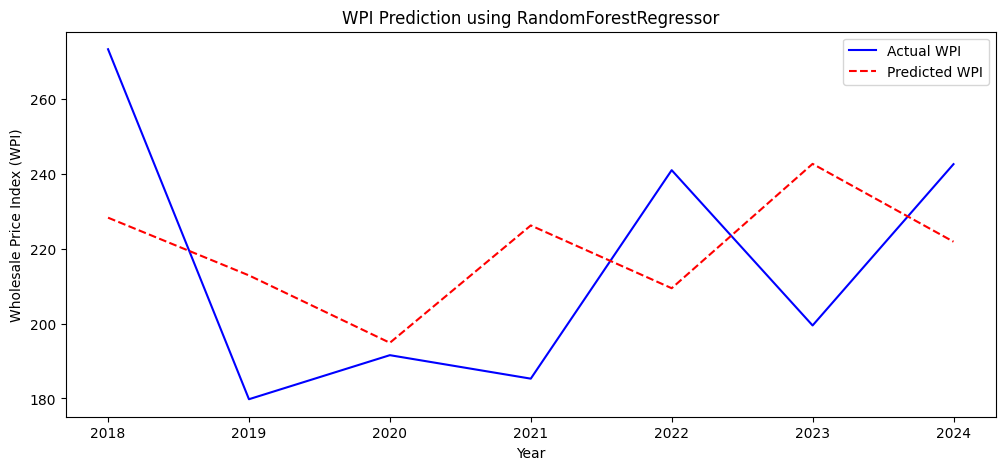

In [265]:
df = df.sort_values(by="Year")
df["WPI_Lag1"] = df["WPI"].shift(1)
df["WPI_Lag2"] = df["WPI"].shift(2)
df.dropna(inplace=True) 
X = df[["WPI_Lag1", "WPI_Lag2"]]
y = df["WPI"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\n🔹 Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")
plt.figure(figsize=(12, 5))
plt.plot(df["Year"][-len(y_test):], y_test, label="Actual WPI", color="blue")
plt.plot(df["Year"][-len(y_test):], y_pred, label="Predicted WPI", color="red", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Wholesale Price Index (WPI)")
plt.title("WPI Prediction using RandomForestRegressor")
plt.legend()
plt.show()

['Year', 'WPI', 'WPI_Lag1', 'WPI_Lag2']
MAE (Mean Absolute Error): 34.50
MSE (Mean Squared Error): 1745.48
RMSE (Root Mean Squared Error): 41.78


c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


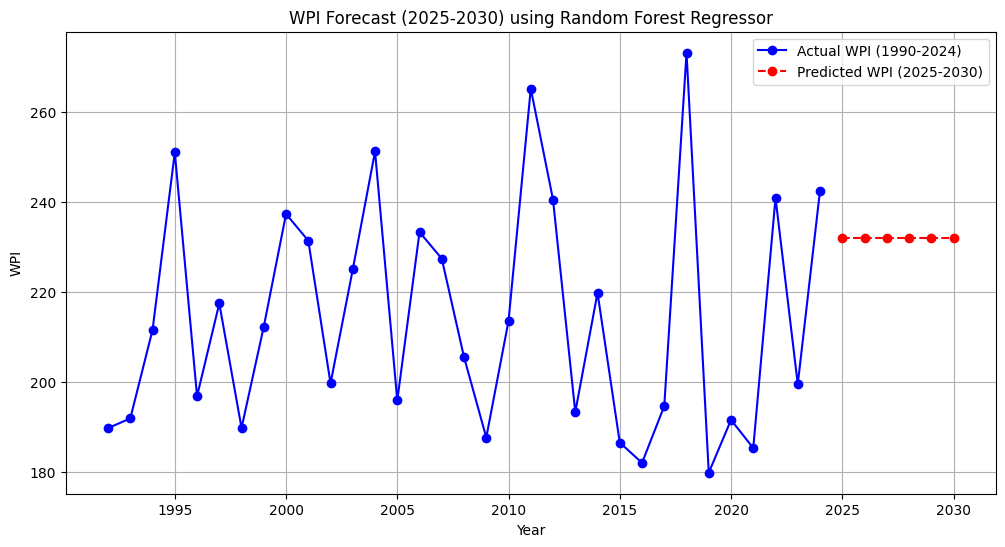


WPI Predictions for 2025-2030:
   Year  Predicted WPI
0  2025     231.935522
1  2026     231.935522
2  2027     231.935522
3  2028     231.935522
4  2029     231.935522
5  2030     231.935522


In [266]:
# 🔹 Ensure correct column names
df.columns = df.columns.str.strip()  
df = df.sort_values(by="Year")

print(df.columns.tolist())


train = df[df["Year"] <= 2024]

X = train[["Year"]]
y = train["WPI"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

future_years = np.array(range(2025, 2031)).reshape(-1, 1)
future_predictions = rf_model.predict(future_years)

forecast_df = pd.DataFrame({"Year": future_years.flatten(), "Predicted WPI": future_predictions})

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["WPI"], label="Actual WPI (1990-2024)", color="blue", marker="o")
plt.plot(forecast_df["Year"], forecast_df["Predicted WPI"], label="Predicted WPI (2025-2030)", color="red", linestyle="dashed", marker="o")
plt.xlabel("Year")
plt.ylabel("WPI")
plt.title("WPI Forecast (2025-2030) using Random Forest Regressor")
plt.legend()
plt.grid(True)
plt.show()

print("\nWPI Predictions for 2025-2030:")
print(forecast_df)

In [267]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.2443 - val_loss: 0.1473
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2457 - val_loss: 0.1374
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1892 - val_loss: 0.1288
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1764 - val_loss: 0.1206
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1890 - val_loss: 0.1123
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1919 - val_loss: 0.1038
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1635 - val_loss: 0.0954
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1156 - val_loss: 0.0877
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1376 - val_loss: 0.0814
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0831 - val_loss: 0.0780
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0734 - val_loss: 0.0778
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0879 - val_loss: 0.0811


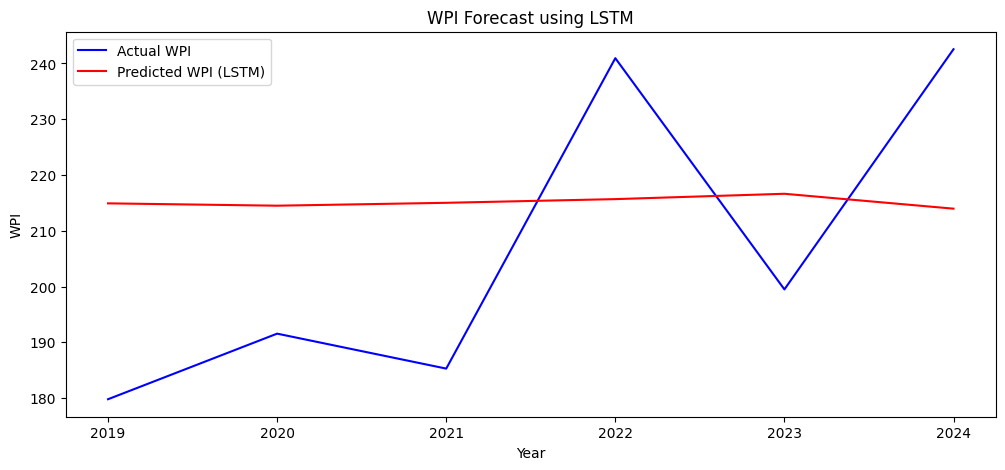

In [268]:
df = df.sort_values(by="Year")
scaler = MinMaxScaler(feature_range=(0, 1))
df["WPI_scaled"] = scaler.fit_transform(df[["WPI"]])

def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 5

data = df["WPI_scaled"].values
X, y = create_sequences(data, seq_length)

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([LSTM(50, activation="relu", return_sequences=True, input_shape=(seq_length, 1)),LSTM(50, activation="relu"), Dense(1)])
model.compile(optimizer="adam", loss="mse")

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

y_pred = model.predict(X_test)

y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(12, 5))
plt.plot(df["Year"][-len(y_test):], y_test_inv, label="Actual WPI", color="blue")
plt.plot(df["Year"][-len(y_test):], y_pred_inv, label="Predicted WPI (LSTM)", color="red")
plt.xlabel("Year")
plt.ylabel("WPI")
plt.title("WPI Forecast using LSTM")
plt.legend()
plt.show()

In [269]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

Column Names in Dataset: Index(['Year', 'WPI', 'WPI_Lag1', 'WPI_Lag2', 'WPI_scaled'], dtype='object')

Augmented Dickey-Fuller Test:
Test Statistic: -5.444027242344285
P-value: 2.7358665604590226e-06
Critical Values: {'1%': np.float64(-3.6996079738860943), '5%': np.float64(-2.9764303469999494), '10%': np.float64(-2.627601001371742)}


c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib

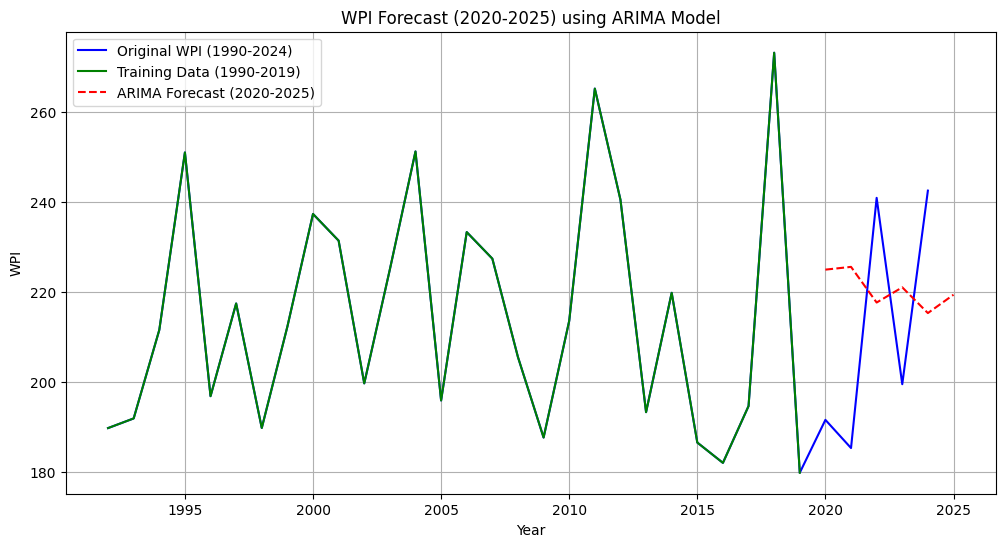

In [270]:
print("Column Names in Dataset:", df.columns)

df.columns = df.columns.str.strip()  
df = df.rename(columns={"Year ": "Year", " WPI": "WPI"}) 

df = df.sort_values(by="Year")

train = df[df["Year"] <= 2019]
test_years = np.arange(2020, 2026) 

train.set_index("Year", inplace=True)

adf_test = adfuller(train["WPI"])
print("\nAugmented Dickey-Fuller Test:")
print(f"Test Statistic: {adf_test[0]}")
print(f"P-value: {adf_test[1]}")
print("Critical Values:", adf_test[4])

d_value = 0 if adf_test[1] < 0.05 else 1 

p, d, q = 2, d_value, 2 
model = ARIMA(train["WPI"], order=(p, d, q))
arima_result = model.fit()

forecast = arima_result.forecast(steps=len(test_years))

forecast_df = pd.DataFrame({"Year": test_years, "Predicted WPI": forecast.values})

plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["WPI"], label="Original WPI (1990-2024)", color="blue", linestyle="-")

plt.plot(train.index, train["WPI"], label="Training Data (1990-2019)", color="green", linestyle="-")

plt.plot(forecast_df["Year"], forecast_df["Predicted WPI"], label="ARIMA Forecast (2020-2025)", color="red", linestyle="dashed")

plt.xlabel("Year")
plt.ylabel("WPI")
plt.title("WPI Forecast (2020-2025) using ARIMA Model")
plt.legend()
plt.grid()

plt.show()



Augmented Dickey-Fuller Test:
Test Statistic: -5.444027242344285
P-value: 2.7358665604590226e-06
Critical Values: {'1%': np.float64(-3.6996079738860943), '5%': np.float64(-2.9764303469999494), '10%': np.float64(-2.627601001371742)}


c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib


Error Metrics:
MAE (Mean Absolute Error): 29.16
MSE (Mean Squared Error): 897.74
RMSE (Root Mean Squared Error): 29.96


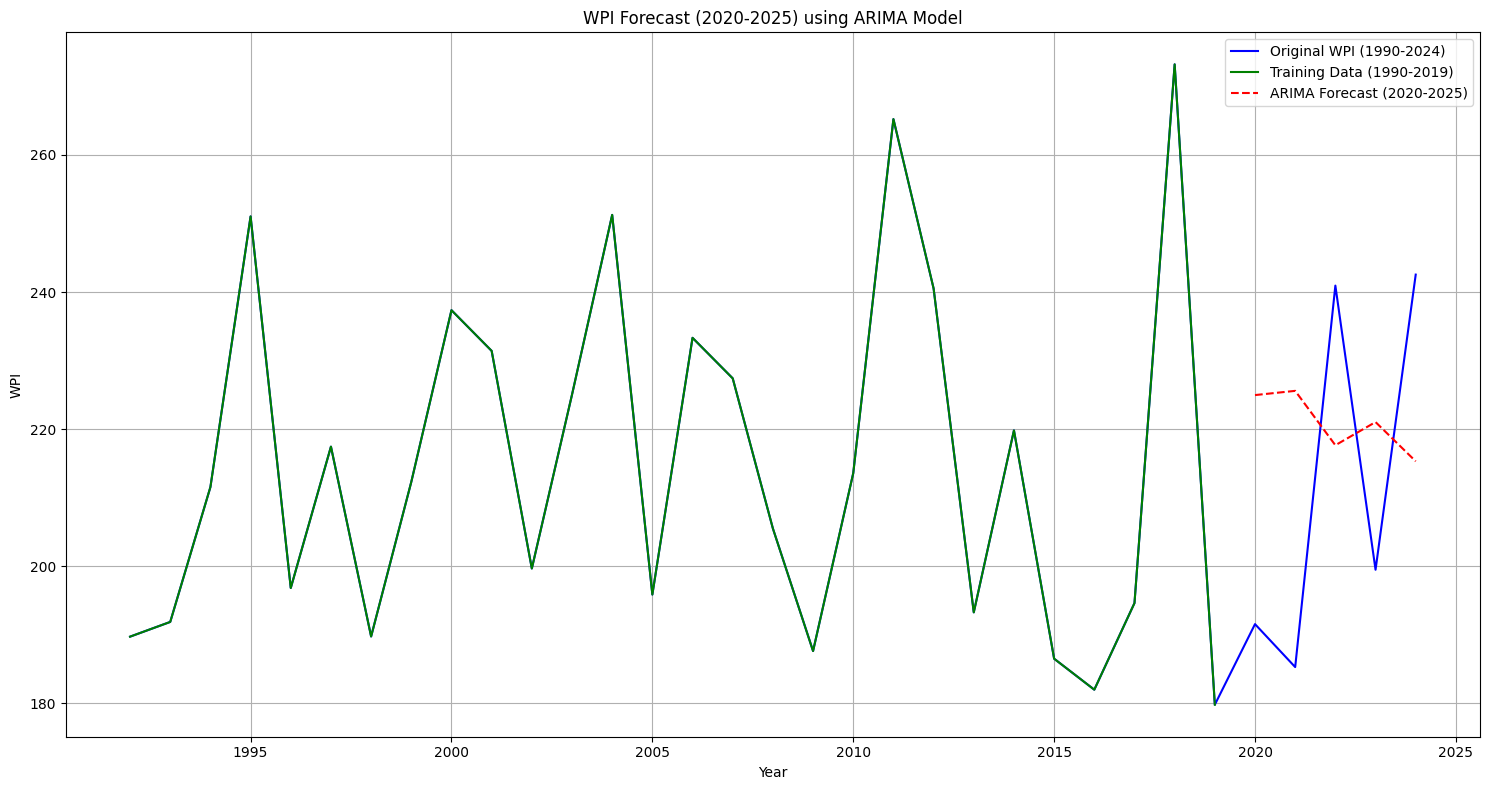

In [271]:
# 🔹 Ensure correct column names
df.columns = df.columns.str.strip()  # Remove extra spaces
df = df.rename(columns={"Year ": "Year", " WPI": "WPI"})  # Adjust names if needed

# 🔹 Sort data by Year
df = df.sort_values(by="Year")

# 🔹 Split Training (1990-2019) & Forecasting Years (2020-2025)
train = df[df["Year"] < 2020]
test = df[df["Year"] >= 2020]  # Actual values for comparison

# 🔹 Ensure 'Year' is set as Index for Training Data
train.set_index("Year", inplace=True)

# 🔹 Forecasting Years
forecast_years = np.arange(2020, 2026)  # 6 years (2020-2025)

# 🔹 Check for Stationarity using ADF Test
adf_test = adfuller(train["WPI"])
print("\nAugmented Dickey-Fuller Test:")
print(f"Test Statistic: {adf_test[0]}")
print(f"P-value: {adf_test[1]}")
print("Critical Values:", adf_test[4])

# 🔹 Determine Differencing Order (d)
d_value = 0 if adf_test[1] < 0.05 else 1  # If data is non-stationary, apply differencing

# 🔹 Fit ARIMA Model (p, d, q values can be optimized)
p, d, q = 2, d_value, 2  # Example values
model = ARIMA(train["WPI"], order=(p, d, q))
arima_result = model.fit()

# 🔹 Forecast WPI for 2020-2025 (Ensure we generate 6 values)
forecast = arima_result.forecast(steps=len(forecast_years))

# 🔹 Create DataFrame for Forecasted Values
forecast_df = pd.DataFrame({"Year": forecast_years, "Predicted WPI": forecast.values})

# 🔹 Ensure test has the same number of values as forecast_df
if len(test) > len(forecast_df):
    test = test.iloc[:len(forecast_df)]  # Trim actual values
elif len(test) < len(forecast_df):
    forecast_df = forecast_df.iloc[:len(test)]  # Trim forecast values

# 🔹 Calculate Error Metrics (if actual values exist in dataset)
if not test.empty:
    mae = mean_absolute_error(test["WPI"], forecast_df["Predicted WPI"])
    mse = mean_squared_error(test["WPI"], forecast_df["Predicted WPI"])
    rmse = np.sqrt(mse)

    print(f"\nError Metrics:")
    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

# 🔹 Plot Actual vs. Forecasted WPI
plt.figure(figsize=(15, 8))

# 🔹 Plot Original WPI (1990-2024)
plt.plot(df["Year"], df["WPI"], label="Original WPI (1990-2024)", color="blue", linestyle="-")

# 🔹 Highlight Training Data (1990-2019)
plt.plot(train.index, train["WPI"], label="Training Data (1990-2019)", color="green", linestyle="-")

# 🔹 Plot Forecasted WPI (2020-2025)
plt.plot(forecast_df["Year"], forecast_df["Predicted WPI"], label="ARIMA Forecast (2020-2025)", color="red", linestyle="dashed")

# 🔹 Labels & Title
plt.xlabel("Year")
plt.ylabel("WPI")
plt.title("WPI Forecast (2020-2025) using ARIMA Model")
plt.legend()
plt.grid()
plt.tight_layout()

# 🔹 Show the Plot
plt.show()


Augmented Dickey-Fuller Test:
Test Statistic: -5.444027242344285
P-value: 2.7358665604590226e-06
Critical Values: {'1%': np.float64(-3.6996079738860943), '5%': np.float64(-2.9764303469999494), '10%': np.float64(-2.627601001371742)}


c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib


Error Metrics:
MAE (Mean Absolute Error): 29.16
MSE (Mean Squared Error): 897.74
RMSE (Root Mean Squared Error): 29.96


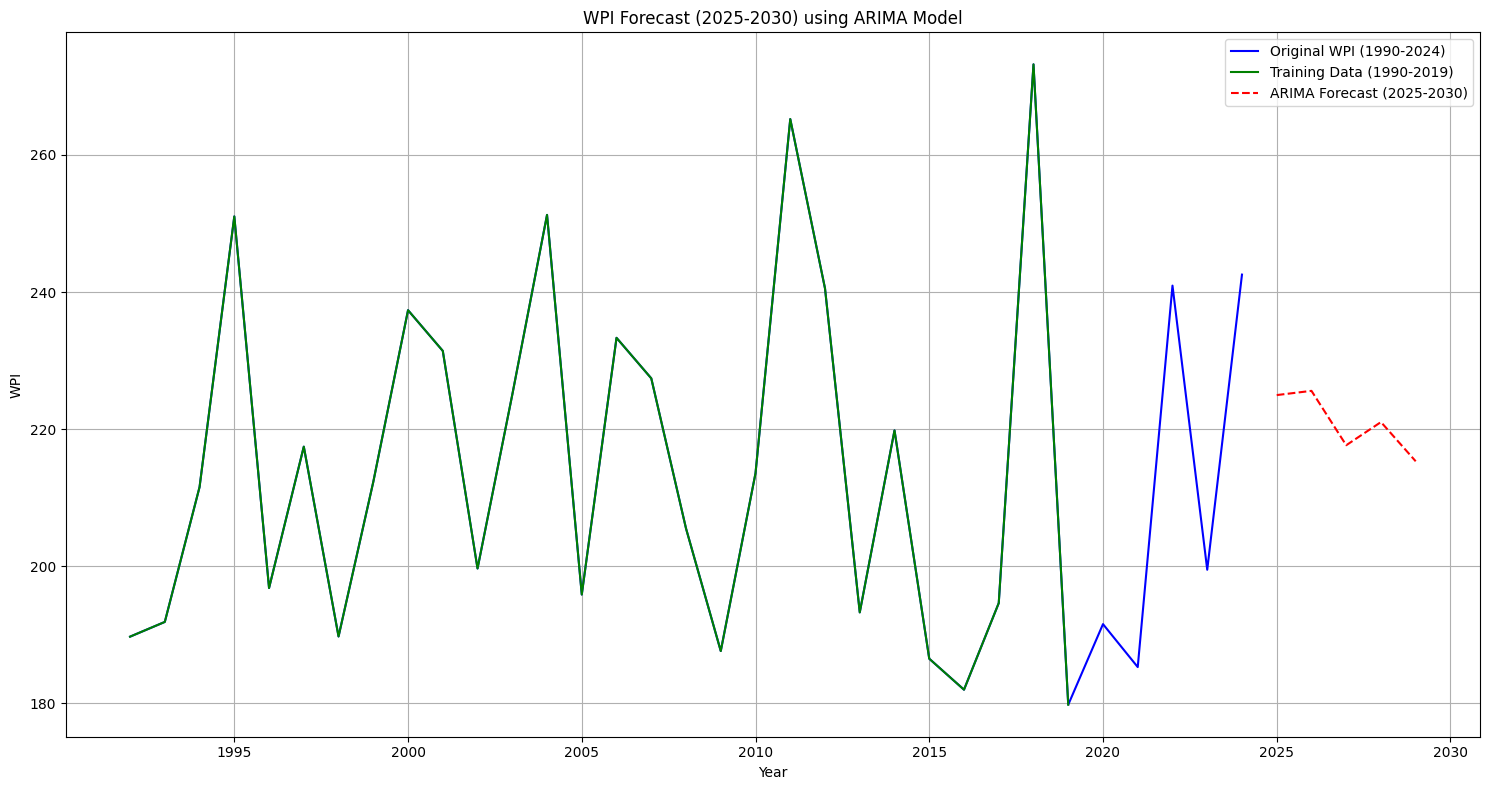

In [272]:
# 🔹 Ensure correct column names
df.columns = df.columns.str.strip()  # Remove extra spaces
df = df.rename(columns={"Year ": "Year", " WPI": "WPI"})  # Adjust names if needed

# 🔹 Sort data by Year
df = df.sort_values(by="Year")

# 🔹 Split Training (1990-2019) & Forecasting Years (2020-2025)
train = df[df["Year"] <= 2019]
test = df[df["Year"] >= 2020]
# Actual values for comparison
# 🔹 Ensure 'Year' is set as Index for Training Data
train.set_index("Year", inplace=True)

# 🔹 Forecasting Years
forecast_years = np.arange(2025, 2030)  # 6 years (2020-2025)

# 🔹 Check for Stationarity using ADF Test
adf_test = adfuller(train["WPI"])
print("\nAugmented Dickey-Fuller Test:")
print(f"Test Statistic: {adf_test[0]}")
print(f"P-value: {adf_test[1]}")
print("Critical Values:", adf_test[4])

# 🔹 Determine Differencing Order (d)
d_value = 0 if adf_test[1] < 0.05 else 1  # If data is non-stationary, apply differencing

# 🔹 Fit ARIMA Model (p, d, q values can be optimized)
p, d, q = 2, d_value, 2  # Example values
model = ARIMA(train["WPI"], order=(p, d, q))
arima_result = model.fit()

# 🔹 Forecast WPI for 2020-2025 (Ensure we generate 6 values)
forecast = arima_result.forecast(steps=len(forecast_years))

# 🔹 Create DataFrame for Forecasted Values
forecast_df = pd.DataFrame({"Year": forecast_years, "Predicted WPI": forecast.values})

# 🔹 Ensure test has the same number of values as forecast_df
if len(test) > len(forecast_df):
    test = test.iloc[:len(forecast_df)]  # Trim actual values
elif len(test) < len(forecast_df):
    forecast_df = forecast_df.iloc[:len(test)]  # Trim forecast values

# 🔹 Calculate Error Metrics (if actual values exist in dataset)
if not test.empty:
    mae = mean_absolute_error(test["WPI"], forecast_df["Predicted WPI"])
    mse = mean_squared_error(test["WPI"], forecast_df["Predicted WPI"])
    rmse = np.sqrt(mse)

    print(f"\nError Metrics:")
    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

# 🔹 Plot Actual vs. Forecasted WPI
plt.figure(figsize=(15, 8))

# 🔹 Plot Original WPI (1990-2024)
plt.plot(df["Year"], df["WPI"], label="Original WPI (1990-2024)", color="blue", linestyle="-")

# 🔹 Highlight Training Data (1990-2019)
plt.plot(train.index, train["WPI"], label="Training Data (1990-2019)", color="green", linestyle="-")

# 🔹 Plot Forecasted WPI (2020-2025)
plt.plot(forecast_df["Year"], forecast_df["Predicted WPI"], label="ARIMA Forecast (2025-2030)", color="red", linestyle="dashed")

# 🔹 Labels & Title
plt.xlabel("Year")
plt.ylabel("WPI")
plt.title("WPI Forecast (2025-2030) using ARIMA Model")
plt.legend()
plt.grid()
plt.tight_layout()

# 🔹 Show the Plot
plt.show()

    Year       WPI  Inflation Rate (%)
1   1993  191.8816            1.132327
2   1994  211.5574           10.254136
3   1995  251.0384           18.662075
4   1996  196.8300          -21.593669
5   1997  217.4527           10.477417
6   1998  189.7584          -12.735781
7   1999  212.3109           11.884849
8   2000  237.3597           11.798170
9   2001  231.4219           -2.501604
10  2002  199.6758          -13.717846
11  2003  225.0317           12.698534
12  2004  251.2593           11.655069
13  2005  195.8788          -22.041174
14  2006  233.3279           19.118506
15  2007  227.4168           -2.533388
16  2008  205.5142           -9.631039
17  2009  187.6320           -8.701199
18  2010  213.5787           13.828505
19  2011  265.2407           24.188742
20  2012  240.5312           -9.315878
21  2013  193.2754          -19.646433
22  2014  219.8234           13.735840
23  2015  186.5167          -15.151572
24  2016  181.9963           -2.423590
25  2017  194.6301       

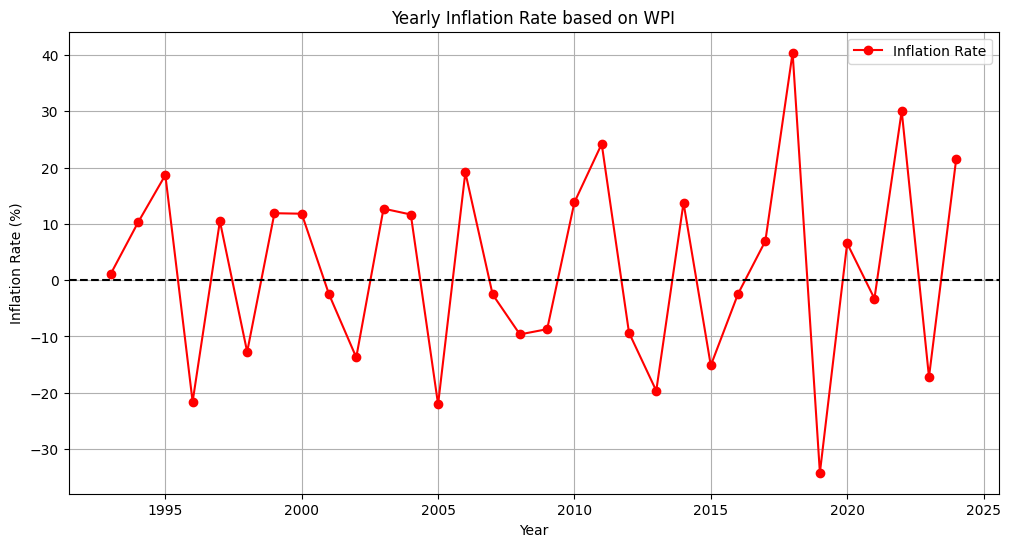

In [273]:

df.columns = df.columns.str.strip()
df = df.rename(columns={"Year ": "Year", " WPI": "WPI"})  

df = df.sort_values(by="Year").reset_index(drop=True)

df["Inflation Rate (%)"] = df["WPI"].pct_change() * 100  

df.dropna(inplace=True)

print(df[["Year", "WPI", "Inflation Rate (%)"]])


plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Inflation Rate (%)"], marker="o", linestyle="-", color="red", label="Inflation Rate")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.title("Yearly Inflation Rate based on WPI")
plt.axhline(y=0, color="black", linestyle="--")
plt.legend()
plt.grid()
plt.show()


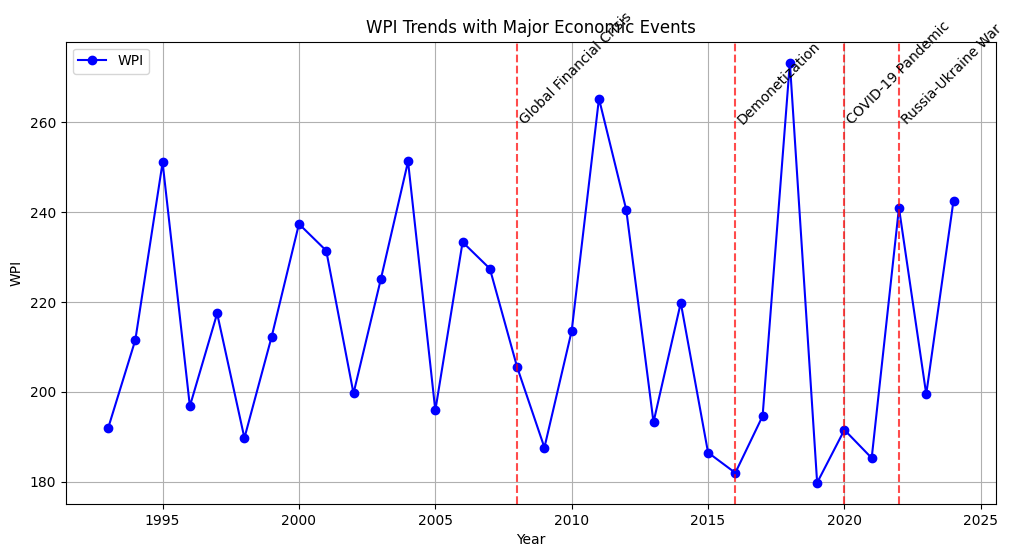

In [274]:
df["Year"] = df["Year"].astype(int)

# Define major macroeconomic events & crisis years
events = {1991: "1991 Economic Crisis",2008: "Global Financial Crisis",2016: "Demonetization",2020: "COVID-19 Pandemic",2022: "Russia-Ukraine War"}

# Plot WPI Trend
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["WPI"], marker="o", linestyle="-", color="blue", label="WPI")

# Highlight economic events
for year, label in events.items():
    if year in df["Year"].values:
        plt.axvline(x=year, color="red", linestyle="--", alpha=0.7)
        plt.text(year, df["WPI"].max() * 0.95, label, rotation=45, color="black")

# Formatting
plt.xlabel("Year")
plt.ylabel("WPI")
plt.title("WPI Trends with Major Economic Events")
plt.legend()
plt.grid(True)
plt.show()


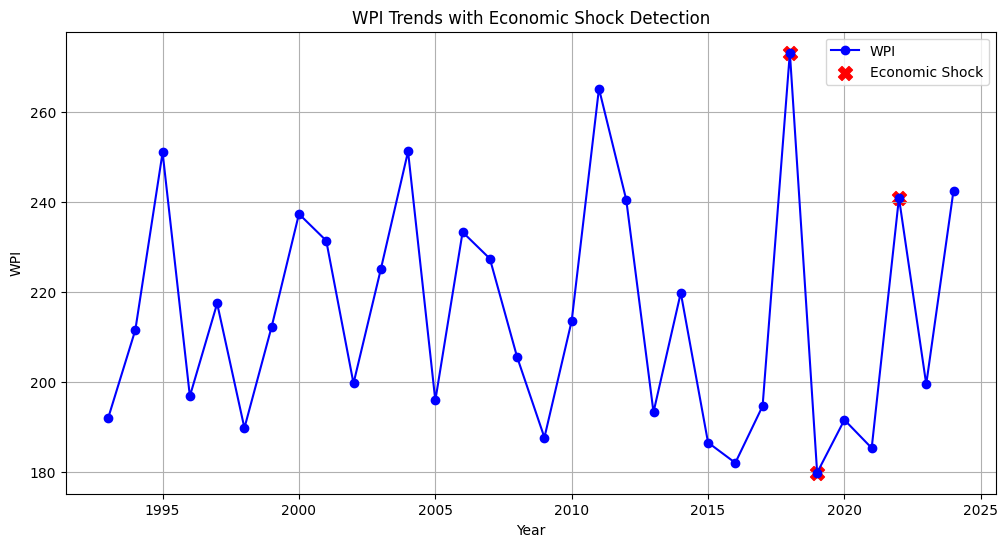

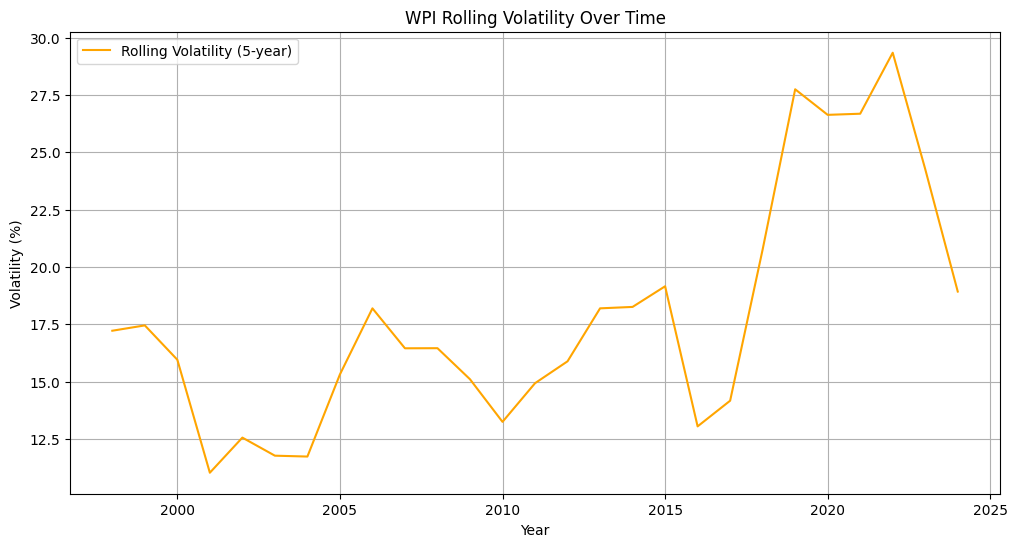


Detected Economic Shock Years:
    Year       WPI  WPI_Change_%
26  2018  273.2243     40.381318
27  2019  179.8054    -34.191285
30  2022  240.9461     30.033644


In [275]:

df["Year"] = df["Year"].astype(int)

# Compute Yearly Percentage Change (WPI Inflation)
df["WPI_Change_%"] = df["WPI"].pct_change() * 100

# Compute Rolling Volatility (5-Year Moving Standard Deviation)
df["Rolling_Volatility"] = df["WPI_Change_%"].rolling(window=5).std()

# Identify Economic Shock Years (Large ±% changes)
shock_threshold = df["WPI_Change_%"].std() * 1.5
df["Shock_Year"] = df["WPI_Change_%"].apply(lambda x: "Shock" if abs(x) > shock_threshold else "Normal")

# Plot WPI Trends & Economic Shocks
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["WPI"], marker="o", label="WPI", color="blue")
plt.scatter(df[df["Shock_Year"] == "Shock"]["Year"], df[df["Shock_Year"] == "Shock"]["WPI"], color="red", label="Economic Shock", marker="X", s=100)
plt.xlabel("Year")
plt.ylabel("WPI")
plt.title("WPI Trends with Economic Shock Detection")
plt.legend()
plt.grid(True)
plt.show()

# Plot WPI Volatility
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Rolling_Volatility"], color="orange", label="Rolling Volatility (5-year)")
plt.xlabel("Year")
plt.ylabel("Volatility (%)")
plt.title("WPI Rolling Volatility Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Show Detected Shock Years
shock_years = df[df["Shock_Year"] == "Shock"][["Year", "WPI", "WPI_Change_%"]]
print("\nDetected Economic Shock Years:")
print(shock_years)


19:49:53 - cmdstanpy - INFO - Chain [1] start processing
19:49:53 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  dates = pd.date_range(


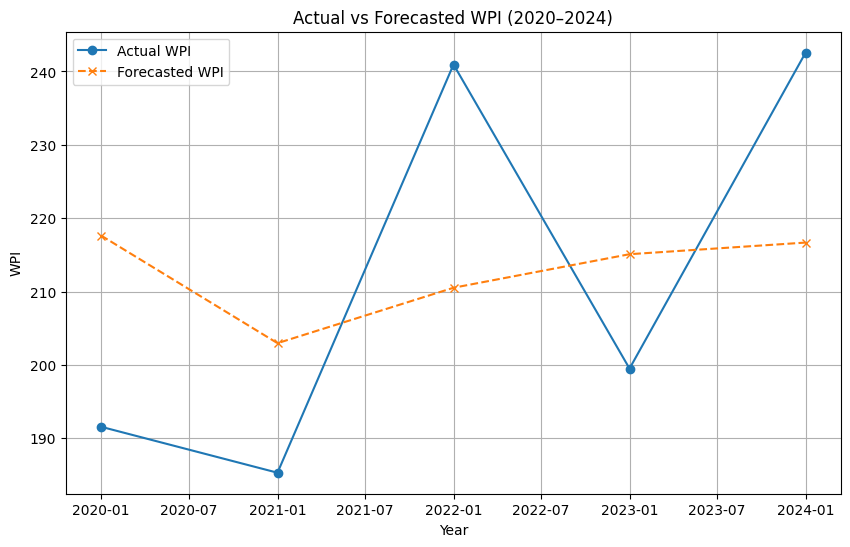

In [276]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("C:\\Users\\gauri\\Downloads\\WPI_Data.xlsx", sheet_name= 'data' )

df.rename(columns={'Year': 'ds', 'WPI': 'y'}, inplace=True)

df['ds'] = pd.to_datetime(df['ds'], format='%Y')

train = df[df['ds'].dt.year < 2020]
test = df[df['ds'].dt.year > 2019]

model = Prophet()
model.fit(train)
future = model.make_future_dataframe(periods=5, freq='AS')
forecast = model.predict(future)

comparison = forecast[['ds', 'yhat']].merge(test, on='ds', how='inner')

plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual WPI', marker='o')
plt.plot(comparison['ds'], comparison['yhat'], label='Forecasted WPI', marker='x', linestyle='--')
plt.title('Actual vs Forecasted WPI (2020–2024)')
plt.xlabel('Year')
plt.ylabel('WPI')
plt.legend()
plt.grid()
plt.show()




19:53:02 - cmdstanpy - INFO - Chain [1] start processing
19:53:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  dates = pd.date_range(


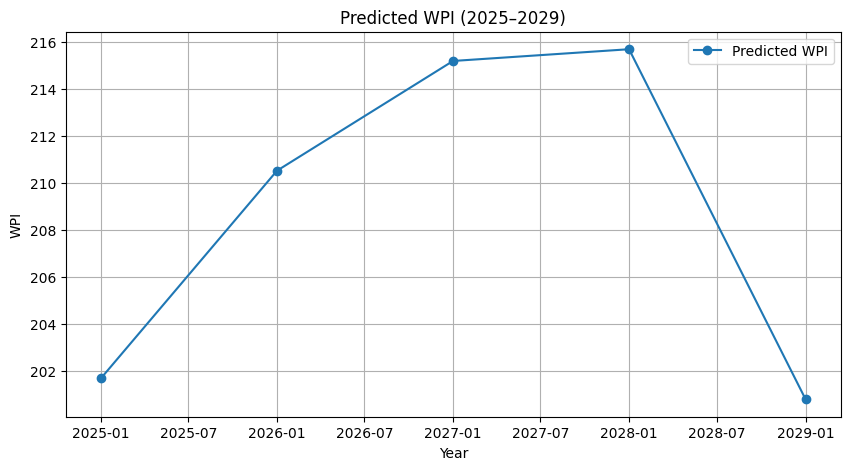

MSE: 566.1710750588006
RMSE: 23.794349645636476
MAE: 23.128079006242125
R-squared: 0.0744605475669533


In [279]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("C:\\Users\\gauri\\Downloads\\WPI_Data.xlsx", sheet_name= 'data' )

df.rename(columns={'Year': 'ds', 'WPI': 'y'}, inplace=True)

df['ds'] = pd.to_datetime(df['ds'], format='%Y')

train = df[df['ds'].dt.year < 2025]

model = Prophet()
model.fit(train)

future1 = model.make_future_dataframe(periods=5, freq='AS')
predicted = model.predict(future1)
predicted_fig = predicted[(predicted['ds'].dt.year > 2024) & (predicted['ds'].dt.year < 2030)]

plt.figure(figsize=(10, 5))
plt.plot(predicted_fig['ds'], predicted_fig['yhat'], label='Predicted WPI', marker='o')
plt.title('Predicted WPI (2025–2029)')
plt.xlabel('Year')
plt.ylabel('WPI')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate MSE
mse = mean_squared_error(test['y'], comparison['yhat'])
# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(test['y'], comparison['yhat'])

# Calculate R-squared
r_squared = r2_score(test['y'], comparison['yhat'])

# Print the results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")



c:\Users\gauri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


Year
2020-01-01    212.113913
2021-01-01    211.865056
2022-01-01    211.616199
2023-01-01    211.367342
2024-01-01    211.118485
dtype: float64


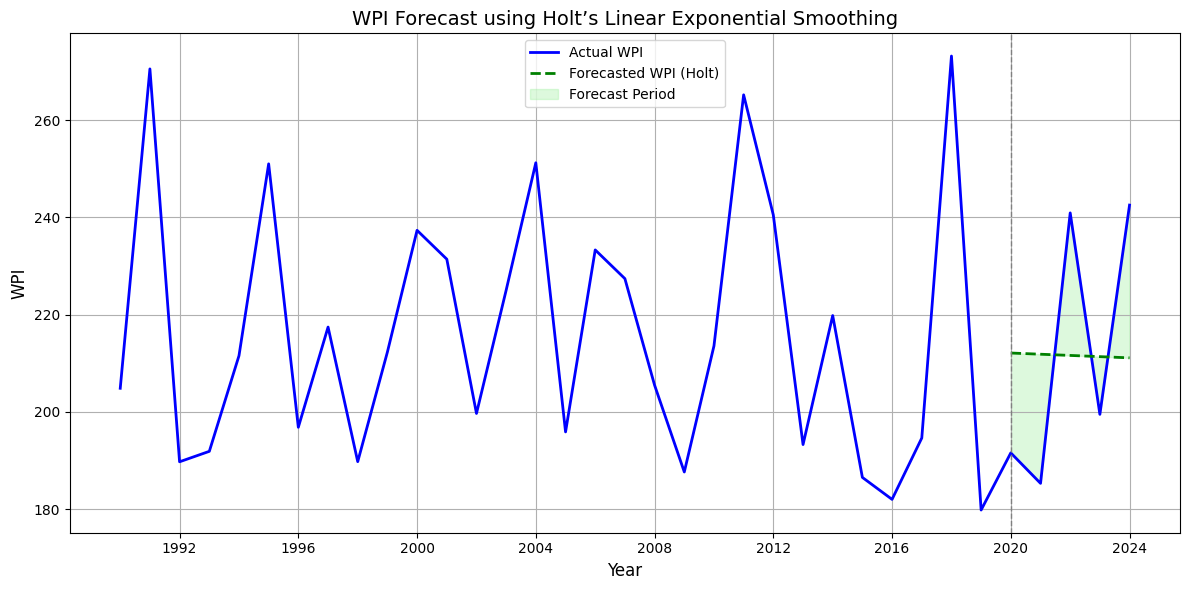

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_excel("C:\\Users\\gauri\\Downloads\\WPI_Data.xlsx", sheet_name= 'data' )
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

train = df.loc[:'2019']
test = df.loc['2020':]

model = ExponentialSmoothing(train['WPI'], trend='add', seasonal=None, damped_trend=False)
model_fit = model.fit()

forecast_periods = len(test)
forecast = model_fit.forecast(steps=forecast_periods)

forecast.index = test.index

print(forecast)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['WPI'], label='Actual WPI', color='blue', linewidth=2)
plt.plot(forecast.index, forecast, label='Forecasted WPI (Holt)', color='green', linewidth=2, linestyle='--')

plt.axvline(pd.to_datetime('2020'), color='gray', linestyle='--', linewidth=1)
plt.fill_between(forecast.index, forecast, df.loc['2020':]['WPI'], 
                 color='lightgreen', alpha=0.3, label='Forecast Period')

plt.title('WPI Forecast using Holt’s Linear Exponential Smoothing', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('WPI', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
